In [2]:
import random
import numpy as np

import shap
import dice_ml
from dice_ml.utils import helpers

import initialization
import evaluation
import parent_selection
import crossover
import survivor_selection
import environment
import mutation

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
def bins_EA(bin_info, pop_size=24, mating_pool_size=8, tournament_size=4, crossover_rate=0, mut_rate=0.3, max_gen=1000, target=25, rng=True):

    if(rng == False):
        random.seed()

    bin_count = len(bin_info.bins)

    # Initialization
    population = initialization.pop_init(pop_size, bin_info, bin_count)
    fitness = [] # Fitness ranges from 0 to bin_count
    for i in population:
        fitness.append(evaluation.fitness(i, bin_info))
    gen = 0
    og_fitness = fitness.copy()
    # Main Evolutionary Loop
    while (gen < max_gen and max(fitness) < target):

        parents = parent_selection.tournament_select(population, fitness, mating_pool_size, tournament_size)
        random.shuffle(parents)
        offspring = []
        offspring_fitness = []
        
        i=0
        while len(offspring) < mating_pool_size:
            # Generates 2 new offspring using PMX
            off = crossover.crossover_main(population[parents[i]], population[parents[i+1]], crossover_rate)
            # Performs inversion mutation on offspring
            off1 = mutation.inv_mut(off[0],mut_rate)
            off2 = mutation.inv_mut(off[1],mut_rate)
            offspring.append(off1)
            offspring.append(off2)
            offspring_fitness.append(evaluation.fitness(off1,bin_info))
            offspring_fitness.append(evaluation.fitness(off2,bin_info))
            i += 2
        population, fitness = survivor_selection.mu_plus_lambda(population, fitness, offspring, offspring_fitness)
        print("gen: ",gen," - max fit: ",max(fitness)," - pop size: ", len(population))
        gen += 1
    return population, fitness, og_fitness, gen

In [4]:
bin_info = environment.BinInfo('../datasets/BinLocations.csv', '../datasets/BinDistances.csv')
pop_size = 50
mating_pool_size = 30 # Must be even
tournament_size = 12
crossover_rate = 0
mut_rate = 0.6
max_gen = 10000
target_fitness = 8

gen_count = 0
population, fitness, fitness_o, gen_count = bins_EA(bin_info, pop_size, mating_pool_size, tournament_size, crossover_rate, mut_rate, max_gen, target_fitness, True)
route = population[fitness.index(max(fitness))]

gen:  0  - max fit:  1.050137097587496  - pop size:  50
gen:  1  - max fit:  1.0528015208290133  - pop size:  50
gen:  2  - max fit:  1.0528015208290133  - pop size:  50
gen:  3  - max fit:  1.0528015208290133  - pop size:  50
gen:  4  - max fit:  1.0528015208290133  - pop size:  50
gen:  5  - max fit:  1.0571692816979366  - pop size:  50
gen:  6  - max fit:  1.0571692816979366  - pop size:  50
gen:  7  - max fit:  1.0571692816979368  - pop size:  50
gen:  8  - max fit:  1.0574279939958775  - pop size:  50
gen:  9  - max fit:  1.0586184968935846  - pop size:  50
gen:  10  - max fit:  1.0592697547375933  - pop size:  50
gen:  11  - max fit:  1.0592697547375933  - pop size:  50
gen:  12  - max fit:  1.0601710264643203  - pop size:  50
gen:  13  - max fit:  1.0601710264643203  - pop size:  50
gen:  14  - max fit:  1.0620820016414905  - pop size:  50
gen:  15  - max fit:  1.0620820016414905  - pop size:  50
gen:  16  - max fit:  1.0620820016414905  - pop size:  50
gen:  17  - max fit:  1.0

#### Evolutionary Algorithm Summary

Best Individual: [24, 44, 85, 52, 9, 31, 69, 2, 55, 4, 67, 22, 29, 59, 73, 45, 79, 50, 18, 32, 60, 230, 252, 204, 165, 155, 207, 212, 231, 201, 206, 227, 245, 202, 319, 113, 381, 111, 48, 76, 63, 247, 236, 72, 21, 66, 225, 217, 226, 249, 243, 240, 222, 228, 235, 239, 233, 229, 250, 221, 241, 211, 255, 253, 220, 203, 213, 248, 242, 223, 77, 177, 94, 292, 1, 12, 70, 74, 3, 54, 83, 71, 87, 41, 75, 15, 56, 64, 30, 58, 20, 53, 89, 86, 42, 40, 121, 195, 148, 280, 287, 26, 210, 251, 254, 244, 208, 216, 232, 383, 369, 325, 396, 317, 335, 395, 363, 361, 367, 125, 108, 139, 324, 181, 373, 318, 238, 349, 388, 218, 256, 234, 320, 394, 364, 348, 375, 313, 328, 338, 147, 316, 371, 379, 376, 261, 265, 282, 193, 311, 293, 278, 300, 138, 164, 190, 162, 131, 126, 120, 145, 171, 296, 279, 128, 271, 294, 97, 115, 303, 268, 197, 263, 167, 281, 100, 127, 102, 198, 273, 357, 322, 312, 315, 336, 344, 343, 339, 314, 356, 323, 330, 378, 384, 387, 351, 352, 342, 321, 391, 370, 334, 353, 354, 298, 266, 366, 289, 

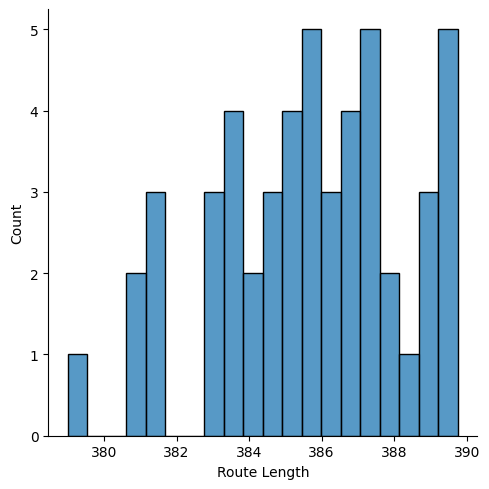

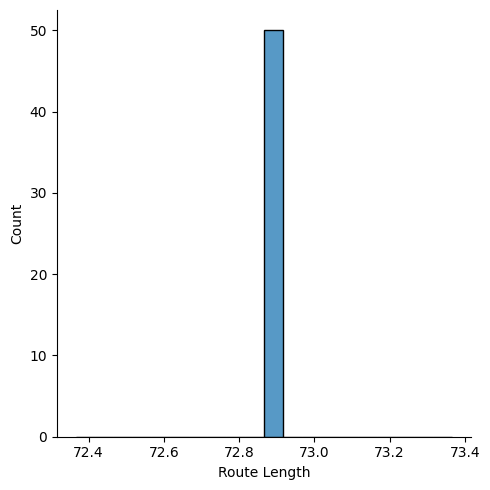

In [5]:
import seaborn as sb
import pandas as pd

print("Best Individual:", route)
print("Best Fitness:", evaluation.fitness(route, bin_info))
print("Best Route Length:", round(len(route)/evaluation.fitness(route, bin_info),2),"KM\n")
fitness_increase = ((sum(fitness) - sum(fitness_o)) / sum(fitness_o))/gen_count
print("Average Improvement Per Generation:",round(fitness_increase*100,2),"% Fitness Increase")
print("Generations to Terminate:", gen_count)
print("Max Generations Allowed", max_gen, "\n")

count = 0
for i in range(len(route)-1):
    if(bin_info.get_dist(route[i], route[i+1]) == 1):
        count += 1
print("\'Bad\' Paths:", count)
len_map = {"Route Length": [len(route)/f for f in fitness]}
len_map = pd.DataFrame(len_map)
len_map_o = {"Route Length": [len(route)/f for f in fitness_o]}
len_map_o = pd.DataFrame(len_map_o)
plot1 = sb.displot(len_map_o,x="Route Length",bins=20)
plot1.set_titles("Original Route Length Distribution")
plot2 = sb.displot(len_map,x="Route Length",bins=20)
plot2.set_titles("Best Route Length Distribution")

#### SHAP Results

In [9]:
bin_data = pd.DataFrame(bin_info.bins, columns=bin_info.headers)
explainer = shap.PermutationExplainer(bins_EA,bin_data)
shap_vals = explainer(bin_data)
shap.plots.waterfall(shap_values=shap_vals)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

#### DiCE Results

In [10]:
#bin_data = pd.DataFrame(bin_info.bins, columns=bin_info.headers)
print(bin_data)

    direction section   streetname1   streetname2 point_latitude  \
0          SW  BKN011  MANHATTAN AV       KENT ST      40.730701   
1           N  BKN011    LORIMER ST   MESEROLE AV      40.727005   
2          SW  BKN011  MANHATTAN AV     DUPONT ST      40.735714   
3           E  BKN011  MANHATTAN AV     CALYER ST      40.728062   
4          SE  BKN011  MANHATTAN AV     DUPONT ST      40.735752   
..        ...     ...           ...           ...            ...   
393        NW  BKN015      GRAND ST  MANHATTAN AV      40.711597   
394        NW  BKN015     GRAHAM AV      DEVOE ST      40.713943   
395        NE  BKN015      GRAND ST     GRAHAM AV      40.711788   
396        SW  BKN015      GRAND ST   BUSHWICK AV        40.7118   
397        SW  BKN015      GRAND ST  MANHATTAN AV      40.711315   

    point_longitude  
0        -73.954559  
1        -73.953476  
2         -73.95533  
3        -73.953026  
4        -73.954933  
..              ...  
393        -73.9459  
394    

#### ALE Results